In [ ]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52.8 MB 215 kB/s 


In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
import glob
import PIL
import numpy
import SimpleITK as sitk
from pprint import pprint
import matplotlib.pylab as plt

filepath = "/content/drive/MyDrive/AI4MED/training/training"

In [ ]:
## first check of the directories

for filename in os.listdir(filepath):
    f = os.path.join(filepath, filename)
    for patient in os.listdir(f):
        d = os.path.join(f, patient)
        print(d)
    break

/content/drive/MyDrive/AI4MED/training/training/patient0005/patient0005_2CH_ED.raw
/content/drive/MyDrive/AI4MED/training/training/patient0005/patient0005_4CH_ED.raw
/content/drive/MyDrive/AI4MED/training/training/patient0005/patient0005_2CH_ED_gt.mhd
/content/drive/MyDrive/AI4MED/training/training/patient0005/patient0005_4CH_ED_gt.mhd
/content/drive/MyDrive/AI4MED/training/training/patient0005/patient0005_4CH_sequence.mhd
/content/drive/MyDrive/AI4MED/training/training/patient0005/patient0005_4CH_ES_gt.raw
/content/drive/MyDrive/AI4MED/training/training/patient0005/patient0005_4CH_ES.raw
/content/drive/MyDrive/AI4MED/training/training/patient0005/patient0005_2CH_ES_gt.raw
/content/drive/MyDrive/AI4MED/training/training/patient0005/patient0005_2CH_sequence.raw
/content/drive/MyDrive/AI4MED/training/training/patient0005/patient0005_4CH_ED.mhd
/content/drive/MyDrive/AI4MED/training/training/patient0005/patient0005_2CH_ES.mhd
/content/drive/MyDrive/AI4MED/training/training/patient0005/pat

In [ ]:
os.listdir(os.path.join(filepath, "patient0001"))

['patient0001_2CH_ED.raw',
 'patient0001_4CH_ES.mhd',
 'patient0001_4CH_ED.raw',
 'patient0001_2CH_sequence.mhd',
 'patient0001_4CH_ES_gt.mhd',
 'patient0001_2CH_ED_gt.mhd',
 'patient0001_2CH_ED_gt.raw',
 'patient0001_2CH_ES.raw',
 'patient0001_4CH_ED_gt.mhd',
 'patient0001_4CH_ES.raw',
 'patient0001_4CH_ES_gt.raw',
 'patient0001_4CH_ED.mhd',
 'patient0001_2CH_ES_gt.mhd',
 'patient0001_2CH_ES.mhd',
 'patient0001_4CH_ED_gt.raw',
 'patient0001_2CH_sequence.raw',
 'patient0001_2CH_ES_gt.raw',
 'patient0001_4CH_sequence.mhd',
 'patient0001_4CH_sequence.raw',
 'Info_4CH.cfg',
 'Info_2CH.cfg',
 'patient0001_2CH_ED.mhd']

In [ ]:
## Getting patients masks
mask = []
for filename in os.listdir(filepath):
    f = os.path.join(filepath, filename)
    for patient in glob.iglob(f"{f}/*_gt.mhd"):
        mask.append(patient)
    break
mask = sorted(mask)

In [ ]:
## Getting patients raws
img = []
for filename in os.listdir(filepath):
    f = os.path.join(filepath, filename)
    for patient in glob.iglob(f"{f}/*.mhd"):
        if ("ED.mhd" in patient) or ("ES.mhd" in patient):
            img.append(patient)
    break
img = sorted(img)

In [ ]:
img

['/content/drive/MyDrive/AI4MED/training/training/patient0005/patient0005_2CH_ED.mhd',
 '/content/drive/MyDrive/AI4MED/training/training/patient0005/patient0005_2CH_ES.mhd',
 '/content/drive/MyDrive/AI4MED/training/training/patient0005/patient0005_4CH_ED.mhd',
 '/content/drive/MyDrive/AI4MED/training/training/patient0005/patient0005_4CH_ES.mhd']

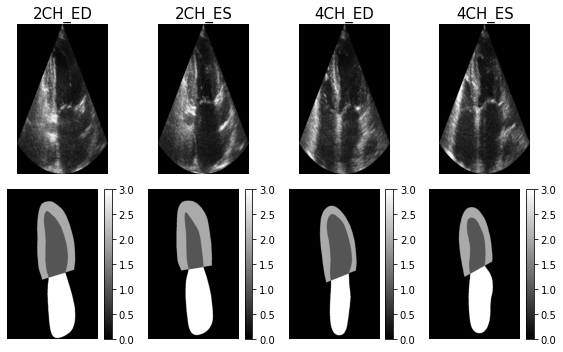

In [ ]:
fig = plt.figure(figsize=(8, 5))
i = 1
for frame, gt in zip(img, mask):
  im = sitk.ReadImage(frame)
  img_npa = sitk.GetArrayFromImage(im)
  img_z = int(im.GetDepth() / 2)
  img_npa_zslice = sitk.GetArrayViewFromImage(im)[img_z, :, :]

  label = sitk.ReadImage(gt)
  label_npa = sitk.GetArrayFromImage(label)
  label_z = int(label.GetDepth() / 2)
  label_npa_zslice = sitk.GetArrayViewFromImage(label)[label_z, :, :]

  fig.add_subplot(2, 4, i)
  plt.imshow(img_npa_zslice.squeeze(), cmap="gray")
  plt.title(frame[-10:-4], fontsize=15)
  plt.axis("off")

  fig.add_subplot(2, 4, i+4)
  plt.imshow(label_npa_zslice, cmap="gray")
  plt.axis("off")
  plt.colorbar()

  i += 1
fig.tight_layout()
plt.show()

# Utils functions

Display image, label and superposition

In [ ]:
def display_image_pair(filename_image, filename_mask, size=(20, 16)):

    if "2CH" in filename_image:
        title = "2 - Chambers"
    else:
        title = "4 - Chambers"

    img = sitk.ReadImage(filename_image)
    img_npa = sitk.GetArrayFromImage(img)
    img_z = int(img.GetDepth() / 2)
    img_npa_zslice = sitk.GetArrayViewFromImage(img)[img_z, :, :]

    label = sitk.ReadImage(filename_mask)
    label_npa = sitk.GetArrayFromImage(label)
    label_z = int(label.GetDepth() / 2)
    label_npa_zslice = sitk.GetArrayViewFromImage(label)[label_z, :, :]

    fig = plt.figure(figsize=size)
    plt.gray()
    plt.axis("off")
    plt.title(title, fontsize=20)

    fig.add_subplot(1, 3, 1)
    plt.imshow(img_npa_zslice.squeeze())
    plt.title("Raw Image ", fontsize=15)
    plt.axis("off")

    fig.add_subplot(1, 3, 2)
    plt.imshow(label_npa_zslice, cmap="cool")
    plt.title("Label", fontsize=15)
    plt.axis("off")

    fig.add_subplot(1, 3, 3)
    plt.imshow(img_npa_zslice)
    plt.imshow(label_npa_zslice, alpha=0.5)
    plt.title("Superposition", fontsize=15)
    plt.axis("off")



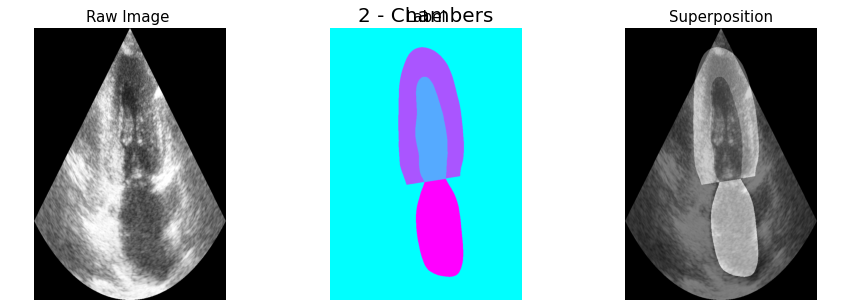

In [ ]:
label = "/content/drive/MyDrive/AI4MED/training/training/patient0004/patient0004_2CH_ES_gt.mhd"
image = "/content/drive/MyDrive/AI4MED/training/training/patient0004/patient0004_2CH_ES.mhd"
display_image_pair(image, label,size=(15,5))

#for i in range(len(img)):
#    label = mask[i]
#    image = img[i]
#    display_image_pair(image, label)

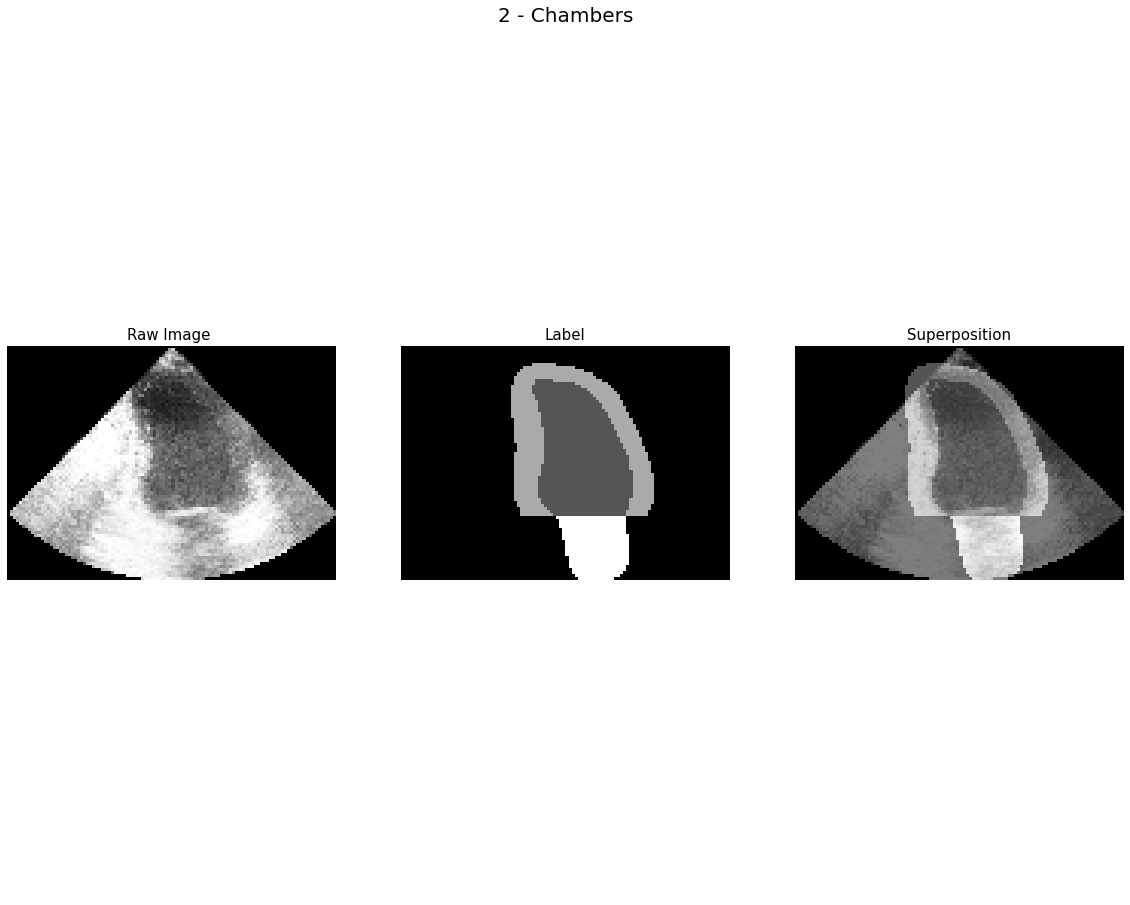

In [ ]:
img = '/content/drive/MyDrive/AI4MED/tgt_dir/patient0001_2CH_ED.mhd'
lbl = '/content/drive/MyDrive/AI4MED/tgt_dir/patient0001_2CH_ED_gt.mhd'
display_image_pair(img, lbl)

In [ ]:
filename = "/content/drive/MyDrive/AI4MED/training/training/patient0005/patient0005_2CH_sequence.mhd"
img = sitk.ReadImage(filename)
img_npa = sitk.GetArrayFromImage(img)
img_z = int(img.GetDepth() / 2)
img_npa_zslice = sitk.GetArrayViewFromImage(img)[img_z, :, :]

In [ ]:
print(img)

Image (0x4b75700)
  RTTI typeinfo:   itk::Image<unsigned char, 3u>
  Reference Count: 1
  Modified Time: 2853
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 2824
  UpdateMTime: 2849
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [591, 973, 20]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [591, 973, 20]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [591, 973, 20]
  Spacing: [0.308, 0.154, 1.54]
  Origin: [0, 0, 0]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.308 0 0
0 0.154 0
0 0 1.54

  PointToIndexMatrix: 
3.24675 0 0
0 6.49351 0
0 0 0.649351

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x4b39930)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, unsigned char>
      Reference Count: 

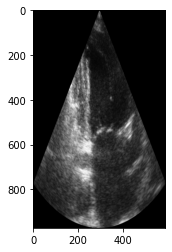

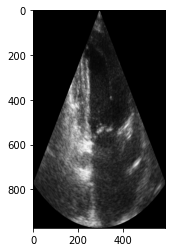

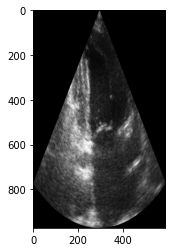

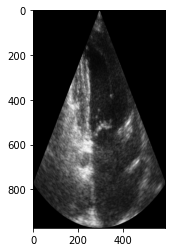

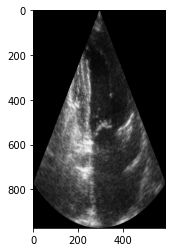

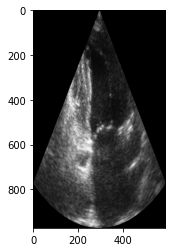

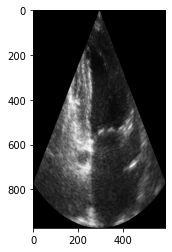

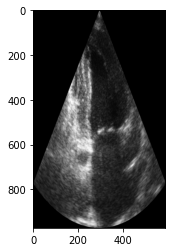

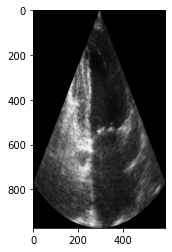

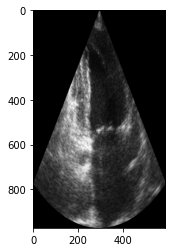

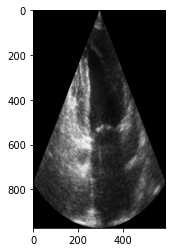

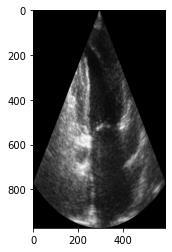

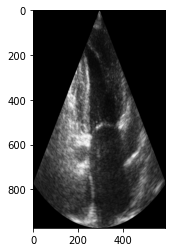

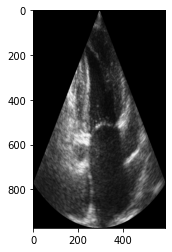

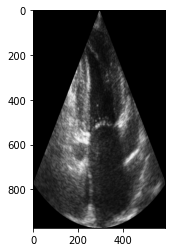

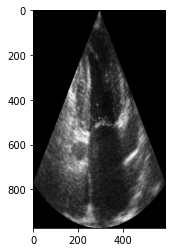

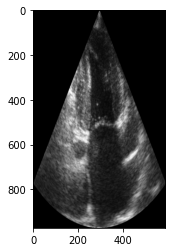

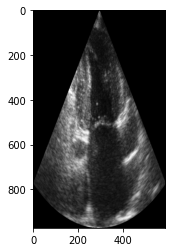

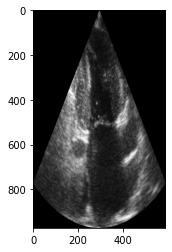

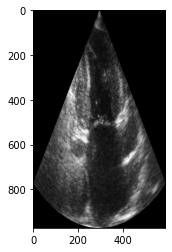

In [ ]:
for im_show in img_npa:
    plt.figure()
    plt.imshow(im_show)